# Amazon Review of kindle

In [1]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
import os
import sys

In [3]:
import json

Only Considering 1 milion rows for preprocessing first

In [4]:
# Define a generator function
def read_json_chunks(filename, chunksize):
    df_iterator = pd.read_json(filename, lines=True, chunksize=chunksize)
    for chunk in df_iterator:
        yield chunk

chunk_generator = read_json_chunks("Kindle_Store.json", 1000000)

In [5]:
# 16 seconds for 1 million rows
first_chunk = next(chunk_generator)


In [6]:
first_chunk.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"12 29, 2012",A27UD5HYAKBL97,1423600150,{'Format:': ' Hardcover'},Cheryl,If you like making salsas this is a great book...,Great Book,1356739200,NaN,NaN
1,5,True,"03 6, 2012",A8P5DK8LLOYGH,1423600150,{'Format:': ' Hardcover'},Shay365,great little book. simple and right to the poi...,great little book,1330992000,3,NaN
2,5,True,"08 12, 2009",A3OM9W7DXSUIIY,1423600150,{'Format:': ' Hardcover'},R. Peckham,This book has good pics of the recipes and eas...,very good bok with good ideas.,1250035200,NaN,NaN
3,3,False,"11 3, 2006",A3DPAR2PWB9BT8,1423600150,{'Format:': ' Hardcover'},JJSS,"I admire the SF School of Cooking, but was dis...",Ok cookbook,1162512000,3,NaN
4,5,False,"04 11, 2006",A2ONTBSAX7GIOV,1423600150,{'Format:': ' Hardcover'},Three Guys from Miami,Many people are surprised to find out that we ...,Fresh and Tasty Ideas from Santa Fe!,1144713600,15,NaN


In [7]:
first_chunk.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [8]:
def get_relevant(raw_data,column_names):
    """
    raw_data: dataframe from JSOn
    column_names: list of column names to be extracted
    """
    interim_data =raw_data.loc[:,column_names]
    interim_data.dropna(inplace=True)
    return interim_data

In [9]:
processed = get_relevant(first_chunk,["reviewerID","asin","overall"])

In [10]:
processed["overall"].value_counts()

overall
5    553623
4    236066
3    107131
1     55375
2     47805
Name: count, dtype: int64

In [11]:
for i in range(8):
    temp_chunk = next(chunk_generator)
    temp_processed = get_relevant(temp_chunk,["reviewerID","asin","overall"])
    processed = pd.concat([processed,temp_processed],axis=0)

StopIteration: 

In [13]:
processed.to_csv("processed_book.csv",index=False)

In [12]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5722988 entries, 0 to 5722987
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   reviewerID  object
 1   asin        object
 2   overall     int64 
dtypes: int64(1), object(2)
memory usage: 131.0+ MB


In [15]:
processed["overall"].value_counts()

overall
5    3479780
4    1252109
3     500582
1     269522
2     220994
0          1
Name: count, dtype: int64

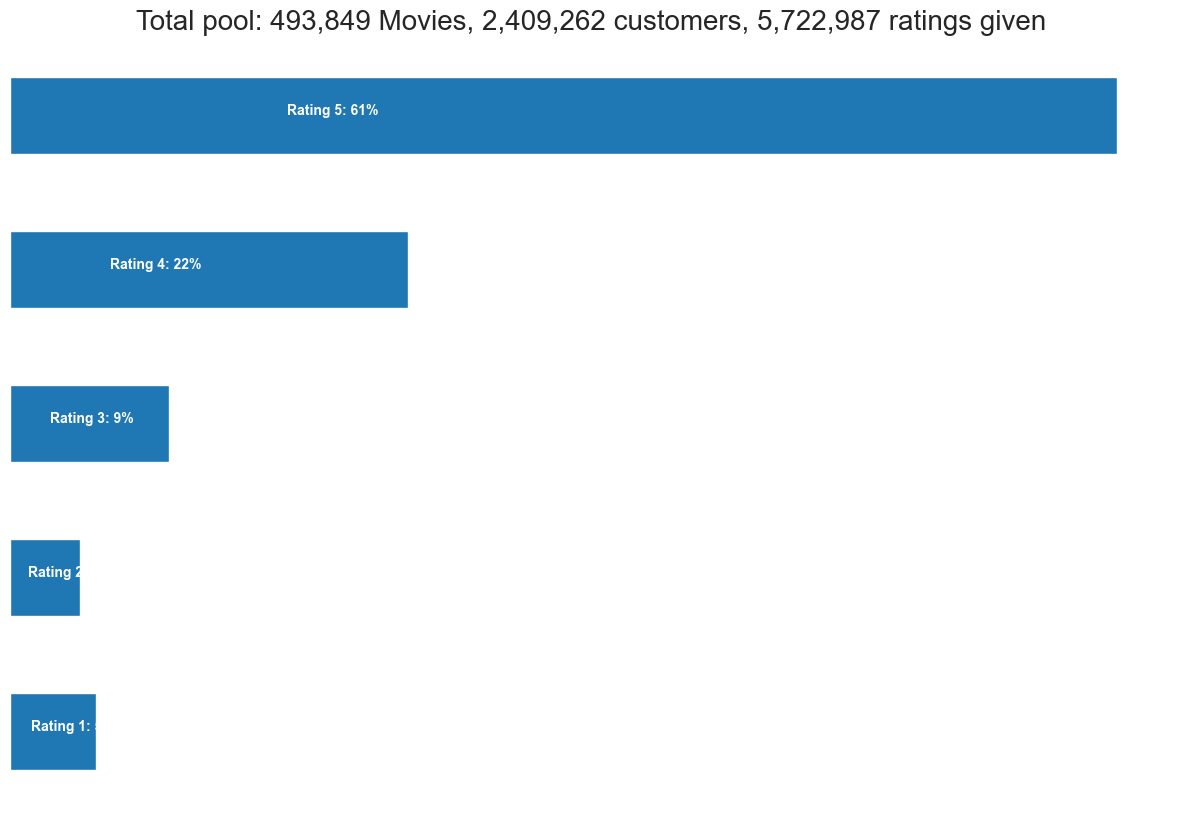

In [17]:
# 50 sec+
processed = processed.loc[processed["overall"]!=0,:]
df=processed
p = df.groupby('overall')['overall'].agg(['count'])

# get movie count
movie_count = df["asin"].nunique()

# get customer count
cust_count = df['reviewerID'].nunique()

# get rating count
rating_count = len(df)

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')